<a href="https://colab.research.google.com/github/indiratwi/SimpleUnivPropertyPrice/blob/main/Simple_Univariate_Analysis_Property_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we start the session, import the library.

In [2]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
sns.set()

print("Library has loaded and session will be started.")

Library has loaded and session will be started.


# Simple Univariate Analysis

In this code, we'll conduct simple univariate analysis each variable in dataset Property Price in Kuala Lumpur. The purpose of simple univariate analysis to describe, summary, and find the pattern of each variable one by one.

In [3]:
#Load dataset from Github into dataframe
raw_link = 'https://raw.githubusercontent.com/indiratwi/SimpleUnivPropertyPrice/main/Property%20Listings%20in%20Kuala%20Lumpur.csv?token=GHSAT0AAAAAACDZNA3IN3GL73NXNEILY7Q4ZEP2LRA'
df = pd.read_csv(raw_link)
#Display top 15 rows dataset
df.head(15)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
6,"Seputeh, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
8,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,950,000",4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished
9,"Sri Petaling, Kuala Lumpur","RM 385,000",3,2.0,1.0,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       5000 non-null   object 
 1   Price          4964 non-null   object 
 2   Rooms          4865 non-null   object 
 3   Bathrooms      4842 non-null   float64
 4   Car Parks      3460 non-null   float64
 5   Property Type  4975 non-null   object 
 6   Size           4890 non-null   object 
 7   Furnishing     4414 non-null   object 
dtypes: float64(2), object(6)
memory usage: 312.6+ KB


From data sampling and dataframe information above, we should conduct data cleansing such as drop missing values, fill missing values, and convert the variable into proper type in order to analyze dataset further.

## **Data Clansing**

As we can see in data sampling, there are several rows with NaN values in both Price and Rooms variable which could't be analyzed further. These rows should be dropped with the following code:

In [5]:
#Index of Rows with NaN values in Price & Rooms
indexNaN_Price_Rooms = df[(df['Price'].isna()) & (df['Rooms'].isna())].index
#Drop rows with the index
df.drop(indexNaN_Price_Rooms,inplace=True)

The type of variable Price is object (not integer) and contain 'RM' that should be convert into numeric.

In [6]:
#Delete 'RM' in front of the numbers
df['Price'] = df['Price'].str.replace('RM ','')
#Delete space between 'RM' and the numbers
df['Price'] = df['Price'].str.replace(',','')
#Convert variable Price into numeric
df['Price'] = pd.to_numeric(df['Price'])

Rooms represents the number or the type of room in a house. Value of Rooms not only contain the number of room in a house, but also contain operator "+" in type object. Operator "+" not functioned because the type of variable is object, therefore we should replace operator "+" with the result of addition these two numbers.

In [7]:
#Fill NaN value with Blank
df['Rooms'].fillna('Blank',inplace=True)
#Replace operator + with real number
df['Rooms'].replace('2+1','3',inplace=True)
df['Rooms'].replace('4+1','5',inplace=True)
df['Rooms'].replace('4+2','6',inplace=True)
df['Rooms'].replace('3+1','4',inplace=True)
df['Rooms'].replace('6+1','7',inplace=True)
df['Rooms'].replace('5+1','6',inplace=True)
df['Rooms'].replace('3+2','5',inplace=True)
df['Rooms'].replace('1+1','2',inplace=True)
df['Rooms'].replace('5+2','7',inplace=True)
df['Rooms'].replace('2+2','4',inplace=True)
df['Rooms'].replace('7+1','8',inplace=True)
df['Rooms'].replace('6+','6',inplace=True)
df['Rooms'].replace('7+','7',inplace=True)
df['Rooms'].replace('1+2','3',inplace=True)
df['Rooms'].replace('8+','8',inplace=True)
df['Rooms'].replace('8+1','9',inplace=True)
df['Rooms'].replace('13+','13',inplace=True)

Bathrooms and Car Parks represents each number of bathrooms and car parks in a house. There are still NaN value in both Bathrooms and Car Parks, we can replace NaN value into 'Unknown' because no property without bathroom and car park.

In [8]:
#Fill NaN value in Bathrooms & Car Parks with Blank.
df['Bathrooms'].fillna('Blank',inplace=True)
df['Car Parks'].fillna('Blank',inplace=True)

For NaN value in Property Type, Size, & Furnishing replace into 'Unknown'.

In [9]:
#Fill NaN value in Property Type, Size, & Furnishing with 'Unknown'.
df['Property Type'].fillna('Unknown',inplace=True)
df['Size'].fillna('Unknown',inplace=True)
df['Furnishing'].fillna('Unknown',inplace=True)

# **Univariate Analysis of Variable Price**

## **Descriptive Statistic**

Descriptive statistic is used to find the pattern and summary the characteristic of data. There are three types of descriptive statistic: distribution, central tendency, and variability. Distribution related to teh frequency. Central tendency related to the mean, median, and mode. While, variability related to the range, standard deviation, and variance. In this code, descriptive statistic of variable Price can be concluded in the following table:


In [10]:
#Function create table descriptive statistic
def desc_stat(data):
  count_data = data.count()
  min_data = data.min()
  max_data = data.max()
  mean_data = round(data.mean())
  mode_data = statistics.mode(data)
  Q1 = np.nanquantile(data,0.25)
  Q2 = np.nanquantile(data,0.5)
  Q3 = np.nanquantile(data,0.75)
  IQR = Q3 - Q1
  low_out = Q1 - (1.5*IQR)
  up_out = Q3 + (1.5*IQR)
  range_data = max_data - min_data
  stdev = np.nanstd(data)
  skew_data = data.skew()
  kurto_data = data.kurtosis()
  tab ={'Item':['Count','Minimum','Maximum','Mean','Mode',
                'Quartile 1','Median','Quartile 3','Interquartile',
                'Lower Outlier', 'Upper Outlier','Range','Standard Dev.',
                'Skewness','Kurtosis',],
        'Value': [count_data,min_data, max_data, mean_data, mode_data,Q1,
                  Q2, Q3, IQR, low_out, up_out, range_data, stdev, skew_data,
                  kurto_data]
      }

  desc_tab = pd.DataFrame(tab)
  print(desc_tab)
  pd.options.display.float_format = '{:,.2f}'.format

#Load variable Price into the function created above
desc_stat(df['Price'])

             Item         Value
0           Count  4.964000e+03
1         Minimum  4.080000e+02
2         Maximum  1.300000e+08
3            Mean  2.135928e+06
4            Mode  1.200000e+06
5      Quartile 1  7.000000e+05
6          Median  1.290900e+06
7      Quartile 3  2.480000e+06
8   Interquartile  1.780000e+06
9   Lower Outlier -1.970000e+06
10  Upper Outlier  5.150000e+06
11          Range  1.299996e+08
12  Standard Dev.  3.404693e+06
13       Skewness  1.521239e+01
14       Kurtosis  4.530456e+02


## **Histogram**

Histogram represents the frequency distribution of continuous data in bar plot.

In [11]:
price = df['Price']

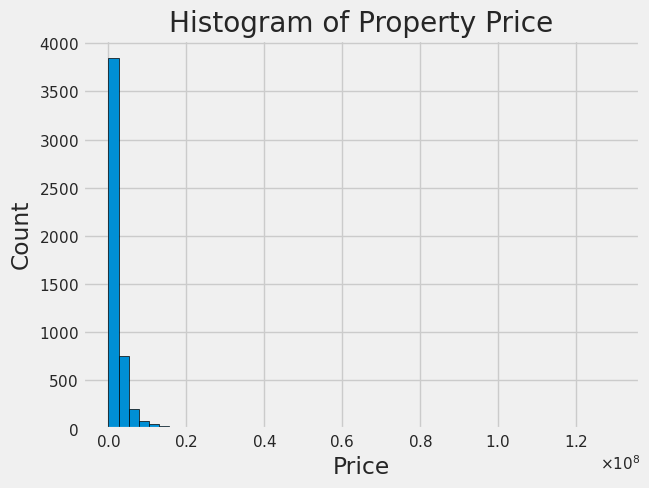

Mean: 2135927
Median: 1290900
Modus: 1200000
Skewness: 15
Kurtosis: 453


In [12]:
plt.style.use('fivethirtyeight')
bins = 50
plt.hist(price, bins=bins, edgecolor='black')
plt.title('Histogram of Property Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.ticklabel_format(useMathText=True)
plt.show()

print("Mean:", int(price.mean()))
print("Median:", int(price.median()))
print("Modus:", int(statistics.mode(price)))
print("Skewness:", int(price.skew()))
print("Kurtosis:", int(price.kurtosis()))

Property Price has skewed-right distribution, which means the value of mean is higher than median (mean > median > modus). Positive skewness means the distribution of data occurs on the one side with the long tail on right side. As we can see in histogram, more population of price falls in the lower-price group (< 20000000 RM) rather than a high-price group. High kurtosis indicates the data has heavier tails outliers means has outliers. If we put the price < 20000000 RM into histogram like following graph:

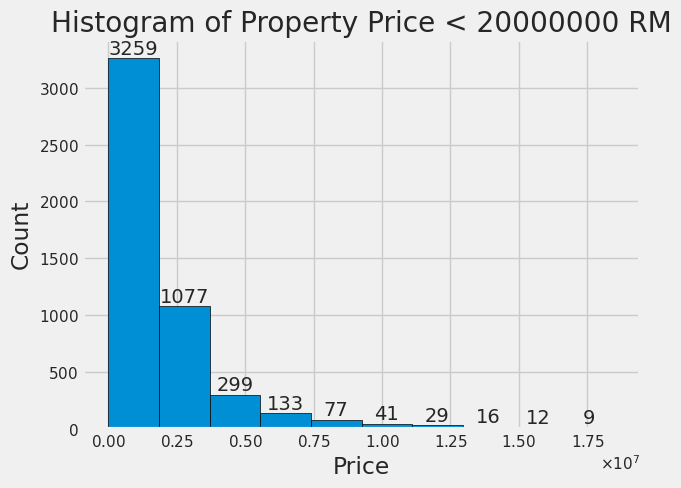

In [13]:
low_price = df[df['Price'] < 20000000][['Price']]
n_bins = 10
counts,edges,bars = plt.hist(low_price, bins=n_bins, edgecolor='black')
plt.title('Histogram of Property Price < 20000000 RM')
plt.xlabel('Price')
plt.ylabel('Count')
plt.bar_label(bars)
plt.ticklabel_format(useMathText=True)
plt.rcParams['font.size'] = 12
plt.show()

60% of property price in Malaysia with range 408 RM - 1250000 RM.

## **Box Plot**

Box plot display five value such as minimum, first quartile, median, third quartile, and maximum of data. These number will be displayed in following graph.

<Axes: >

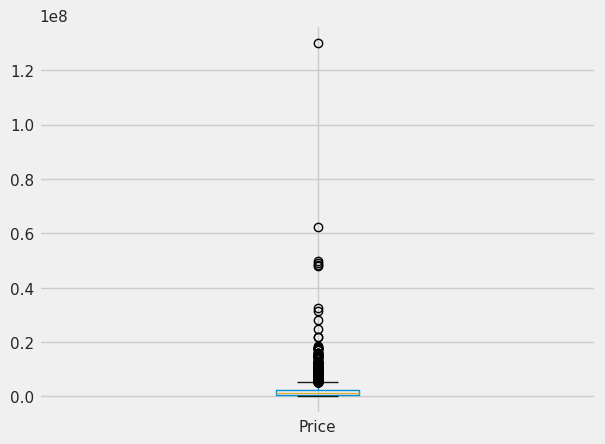

In [14]:
df.boxplot('Price')

From the boxplot above, we know the data has outlier which price above

# **Univariate Analysis of Variable Rooms**

# **Descriptive Data on Room Type**

Desriptive data on Room Type to find the number and the average of price each room type.

In [15]:
#Set indext to sort room type because variable 'Rooms' is object,
#not integer can be sorted ascending
custom_dict = {'1':0,'2':1,'3':2,'4':3,'5':4,'6':5,'7':6,'8':7,'9':8,
               '10':9,'12':10,'13':11,'14':12,'20 Above':13,'Studio':14,
               'Blank':15}

#Table descriptive data room
desc_room = df.groupby('Rooms').agg(
    Room_Count = ('Rooms',np.size),
    Average_Price = ('Price',np.mean)
    ).sort_values(by=['Rooms'],key=lambda x:x.map(custom_dict))
desc_room

,Room_Count,Average_Price
Rooms,,
1,240,"934,682.85"
2,600,"1,089,985.48"
3,1190,"895,459.81"
4,1304,"1,650,903.17"
5,843,"2,794,157.61"
6,413,"4,206,820.13"
7,161,"6,114,111.29"
8,44,"8,360,181.82"
9,10,"14,150,000.00"


**Room Type Distribution**

Distribution of room type can be seen in following graph.

Text(0, 0.5, 'Room Type')

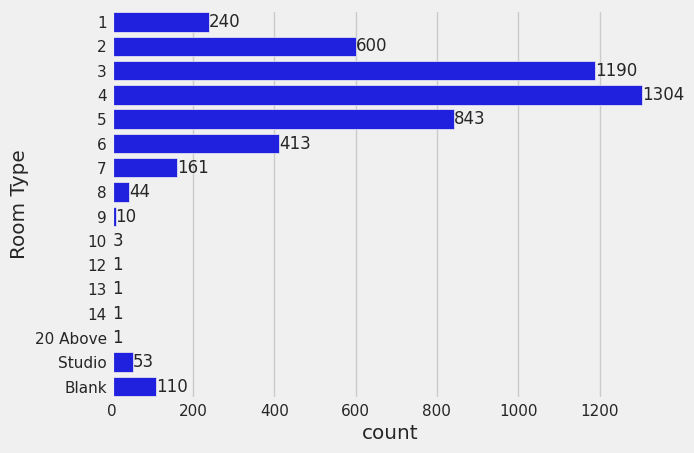

In [16]:
ax = sns.countplot(y=df['Rooms'],color='blue',order=desc_room.index)
ax.bar_label(ax.containers[0])
plt.ylabel('Room Type')

50% of property dominated by 3 and 4 rooms type.

# **Univariate Analysis of Variable Furnishing**

**Descriptive Data on Furnishing Type**

Desriptive data on Furnishing Type to find the number and the average of price each furnishing type.

In [17]:
#Table descriptive data room
desc_furnish = df.groupby('Furnishing').agg(
    Furnish_Count = ('Furnishing',np.size),
    Average_Price = ('Price',np.mean)
    ).sort_values('Furnishing')

desc_furnish

,Furnish_Count,Average_Price
Furnishing,,
Fully Furnished,1253,"1,801,837.97"
Partly Furnished,2658,"2,250,614.97"
Unfurnished,457,"1,818,154.26"
Unknown,607,"2,562,765.08"


In [18]:
sum(desc_furnish['Furnish_Count'])

4975

**Furnishing Type Distribution**

Distribution of furnishing type can be seen in following graph.

[Text(0, 0, '1253'), Text(0, 0, '2658'), Text(0, 0, '457'), Text(0, 0, '607')]

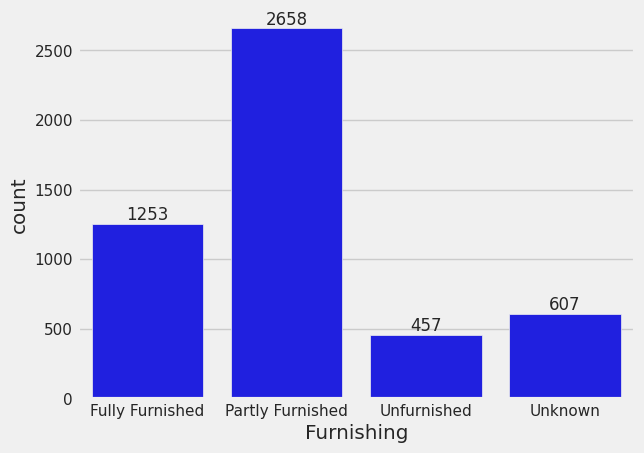

In [19]:
ax = sns.countplot(x=df['Furnishing'],color='blue',order=desc_furnish.index)
ax.bar_label(ax.containers[0])

50% of property dominated by partly furnished.